In [1]:
import sys
sys.path.insert(0, '../../../network')

In [2]:
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule
from sequences import GaussianSequence
import matplotlib.pyplot as plt
import seaborn as sns
logging.basicConfig(level=logging.INFO)

In [3]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
ctx = Population(N=1000, tau=1e-2, phi=phi, name='ctx')
bg = Population(N=1000, tau=1e-2, phi=phi, name='bg')
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8) 

S, P = 1, 3
sequences_ctx = [GaussianSequence(P,ctx.size, seed=5) for i in range(S)]
patterns_ctx = np.stack([s.inputs for s in sequences_ctx])
sequences_bg = [GaussianSequence(P,ctx.size, seed=29) for i in range(S)]
patterns_bg = np.stack([s.inputs for s in sequences_bg])

J_cc = SparseConnectivity(source=ctx, target=ctx, p=0.05)
synapse_cc = LinearSynapse(J_cc.K, A=5)
J_cc.store_attractors(patterns_ctx[0], patterns_ctx[0], synapse_cc.h_EE, 
                      plasticity.f, plasticity.g)
J_bb = SparseConnectivity(source=bg, target=bg, p=0.05)
synapse_bb = LinearSynapse(J_bb.K, A=5)
J_bb.store_attractors(patterns_bg[0], patterns_bg[0], synapse_bb.h_EE, 
                      plasticity.f, plasticity.g)
J_cb  = SparseConnectivity(source=bg, target=ctx, p=0.05)
synapse_cb = LinearSynapse(J_cb.K, A=1)
J_cb.store_attractors(patterns_bg[0], patterns_ctx[0], synapse_cb.h_EE, 
                      plasticity.f, plasticity.g)

J_bc = SparseConnectivity(source=ctx, target=bg, p=0.05)
synapse_bc = LinearSynapse(J_bc.K, A=0)
J_bc.store_sequences(patterns_ctx, patterns_bg, synapse_bc.h_EE, plasticity.f, plasticity.g)
# J_bc.update_sequences(patterns_ctx[0][0], patterns_bg[0][1],
#                    .6, lamb=1,f=plasticity.f, g=plasticity.g)
# J_bc.update_sequences(patterns_ctx[0][1], patterns_bg[0][2],
#                    .6, lamb=1,f=plasticity.f, g=plasticity.g)
# J_bc.update_sequences(patterns_ctx[0][2], patterns_bg[0][0],
#                    .6, lamb=1,f=plasticity.f, g=plasticity.g)
# J_bc.update_sequences(patterns_ctx[0][0], patterns_bg[0][2],
#                    .4, lamb=1,f=plasticity.f, g=plasticity.g)
# J_bc.update_sequences(np.random.randn(ctx.size), np.random.randn(bg.size),
#                    0.7, lamb=1,f=plasticity.f, g=plasticity.g)
net_ctx = RateNetwork(ctx, c_EE=J_cc, c_IE=J_bc, formulation=4)
net_bg = RateNetwork(bg, c_II=J_bb, c_EI=J_cb, formulation=4)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Storing attractors
100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 19911.15it/s]
INFO:connectivity:Building connections from bg to bg
INFO:connectivity:Storing attractors
100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 22179.29it/s]
INFO:connectivity:Building connections from bg to ctx
INFO:connectivity:Storing attractors
100%|██████████████████████████████████| 1000/1000 [00:00<00:00, 22169.09it/s]
INFO:connectivity:Building connections from ctx to bg
INFO:connectivity:Storing sequences
100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 22.22it/s]
INFO:connectivity:Applying synaptic transfer function
INFO:connectivity:Building sparse matrix


In [4]:
# init_input_ctx = np.random.RandomState().normal(0,1,size=patterns_ctx[0][0].shape)
# init_input_bg = np.random.RandomState().normal(0,1,size=patterns_bg[0][0].shape)
init_input_ctx = patterns_ctx[0][0]
init_input_bg = patterns_bg[0][0]
T=10
mouse = ReachingTask(3, alpha=0.5)
# net_ctx.simulate_learning(mouse, net_bg, T, init_input_ctx, init_input_bg, 
#                           phi(patterns_ctx[0]), phi(patterns_bg[0]), plasticity, detection_thres=.23)
net_ctx.simulate_learning(mouse, net_bg, T, init_input_ctx, init_input_bg, 
                          patterns_ctx[0], patterns_bg[0], plasticity, detection_thres=.23)

INFO:network:Integrating network dynamics
  1%|▏                                    | 53/9999 [01:07<1:47:31,  1.54it/s]

None 0


  1%|▍                                     | 107/9999 [01:10<37:12,  4.43it/s]

[0, 0] 54


  1%|▍                                     | 122/9999 [01:10<24:22,  6.75it/s]

[0, -1] 11


  3%|█                                     | 285/9999 [01:17<07:03, 22.92it/s]

aim-->reach


  3%|█▎                                    | 330/9999 [01:19<06:58, 23.08it/s]

[0, 1] 206


  3%|█▎                                    | 333/9999 [01:19<07:02, 22.87it/s]

[-1, 1] 4


  4%|█▍                                    | 369/9999 [01:21<07:06, 22.57it/s]

[1, 1] 33
[1, -1] 0
[1, 1] 1


  4%|█▍                                    | 372/9999 [01:21<07:08, 22.47it/s]

[1, -1] 1
[1, 2] 0
[1, -1] 0


  5%|█▉                                    | 504/9999 [01:27<06:56, 22.80it/s]

reach-->lick


  5%|██                                    | 534/9999 [01:28<06:57, 22.65it/s]

[1, 2] 159
Mouse received reward


  6%|██                                    | 552/9999 [01:29<06:54, 22.80it/s]

[-1, 2] 17


  7%|██▌                                   | 681/9999 [01:35<06:38, 23.40it/s]

[2, 2] 126


  8%|██▊                                   | 753/9999 [01:38<06:41, 23.04it/s]

[2, -1] 71


  8%|██▉                                   | 789/9999 [01:39<06:37, 23.15it/s]

lick-->lick


  8%|███                                   | 801/9999 [01:40<06:37, 23.14it/s]

lick-->aim


  8%|███▏                                  | 840/9999 [01:41<06:34, 23.22it/s]

[2, 0] 86
[-1, 0] 0
[2, 0] 1


  9%|███▏                                  | 852/9999 [01:42<06:36, 23.09it/s]

[-1, 0] 8


  9%|███▎                                  | 864/9999 [01:42<06:32, 23.26it/s]

[0, 0] 11
[0, -1] 0
[0, 0] 0


  9%|███▎                                  | 870/9999 [01:43<06:33, 23.18it/s]

[0, -1] 3
[0, 1] 1
[0, -1] 1


 10%|███▊                                 | 1029/9999 [01:50<06:28, 23.11it/s]

aim-->reach
reach-->reach


 11%|███▉                                 | 1065/9999 [01:51<06:22, 23.36it/s]

[0, 1] 190


 11%|███▉                                 | 1071/9999 [01:51<06:31, 22.83it/s]

[-1, 1] 6


 11%|███▉                                 | 1080/9999 [01:52<06:27, 23.05it/s]

[-1, -1] 8
[1, 2] 0
Mouse received reward
[-1, 2] 0


 12%|████▎                                | 1170/9999 [01:56<06:32, 22.51it/s]

reach-->lick


 12%|████▍                                | 1203/9999 [01:57<06:25, 22.81it/s]

[1, 2] 121


 12%|████▌                                | 1221/9999 [01:58<06:20, 23.05it/s]

[-1, 2] 16


 14%|█████▏                               | 1386/9999 [02:05<06:18, 22.73it/s]

[2, 2] 163


 14%|█████▎                               | 1449/9999 [02:08<06:16, 22.73it/s]

[2, -1] 63


 15%|█████▋                               | 1524/9999 [02:11<06:08, 23.01it/s]

[2, 0] 75


 15%|█████▋                               | 1539/9999 [02:12<06:08, 22.96it/s]

lick-->aim


 16%|█████▊                               | 1557/9999 [02:13<06:10, 22.78it/s]

[-1, 0] 31


 16%|█████▊                               | 1566/9999 [02:13<06:17, 22.36it/s]

[-1, -1] 7


 16%|█████▊                               | 1587/9999 [02:14<06:22, 22.02it/s]

[-1, 1] 22


 17%|██████▏                              | 1689/9999 [02:18<06:00, 23.05it/s]

aim-->reach


 17%|██████▍                              | 1728/9999 [02:20<05:56, 23.18it/s]

[0, 1] 140


 17%|██████▍                              | 1740/9999 [02:21<05:58, 23.06it/s]

[-1, 1] 10


 18%|██████▋                              | 1800/9999 [02:23<05:54, 23.13it/s]

[1, 1] 59


 18%|██████▋                              | 1809/9999 [02:24<05:54, 23.09it/s]

[1, -1] 7


 19%|███████▏                             | 1935/9999 [02:29<05:46, 23.26it/s]

reach-->lick


 20%|███████▎                             | 1968/9999 [02:30<05:58, 22.42it/s]

[1, 2] 158
Mouse received reward


 20%|███████▎                             | 1986/9999 [02:31<05:48, 22.98it/s]

[-1, 2] 17


 21%|███████▊                             | 2112/9999 [02:37<05:38, 23.32it/s]

[2, 2] 126


 22%|████████                             | 2181/9999 [02:40<05:39, 23.06it/s]

[2, -1] 68


 22%|████████▎                            | 2241/9999 [02:42<05:38, 22.95it/s]

lick-->aim


 23%|████████▍                            | 2277/9999 [02:44<05:32, 23.24it/s]

[2, 0] 96
[2, -1] 3


 23%|████████▍                            | 2283/9999 [02:44<05:37, 22.86it/s]

[-1, -1] 0
[-1, 1] 0
[-1, -1] 0


 23%|████████▍                            | 2289/9999 [02:44<05:40, 22.63it/s]

[-1, 1] 4


 24%|████████▊                            | 2385/9999 [02:49<05:34, 22.78it/s]

aim-->reach
reach-->reach


 24%|████████▊                            | 2394/9999 [02:49<05:35, 22.64it/s]

reach-->reach


 24%|████████▉                            | 2400/9999 [02:49<05:33, 22.79it/s]

reach-->reach


 24%|████████▉                            | 2430/9999 [02:50<05:29, 22.97it/s]

[0, 1] 140
[-1, 1] 3


 24%|█████████                            | 2436/9999 [02:51<05:29, 22.93it/s]

[1, 1] 0
[-1, 1] 0
[1, 1] 0


 24%|█████████                            | 2442/9999 [02:51<05:31, 22.79it/s]

[-1, 1] 4
[1, 1] 3


 24%|█████████                            | 2448/9999 [02:51<05:28, 22.96it/s]

[-1, 1] 1


 25%|█████████                            | 2463/9999 [02:52<05:28, 22.91it/s]

[1, 1] 13
[1, -1] 0


 25%|█████████▏                           | 2478/9999 [02:53<05:29, 22.82it/s]

[1, 1] 13
[1, -1] 0


 26%|█████████▋                           | 2628/9999 [02:59<05:22, 22.82it/s]

reach-->lick


 27%|█████████▊                           | 2664/9999 [03:01<05:22, 22.75it/s]

[1, 2] 185
Mouse received reward


 27%|█████████▉                           | 2679/9999 [03:01<05:17, 23.03it/s]

[-1, 2] 12


 28%|██████████▎                          | 2784/9999 [03:06<05:18, 22.66it/s]

[2, 2] 105


 29%|██████████▌                          | 2850/9999 [03:09<05:15, 22.66it/s]

[2, -1] 64


 29%|██████████▊                          | 2925/9999 [03:12<05:24, 21.83it/s]

lick-->aim


 30%|██████████▉                          | 2970/9999 [03:14<05:08, 22.76it/s]

[2, 0] 120
[-1, 0] 3


 30%|███████████                          | 2991/9999 [03:15<05:03, 23.08it/s]

[0, 0] 15
[0, -1] 0
[0, 0] 0
[0, -1] 0


 31%|███████████▌                         | 3123/9999 [03:21<04:57, 23.10it/s]

aim-->reach


 31%|███████████▌                         | 3132/9999 [03:21<04:57, 23.06it/s]

reach-->reach


 32%|███████████▋                         | 3168/9999 [03:23<04:55, 23.14it/s]

[0, 1] 173


 32%|███████████▋                         | 3171/9999 [03:23<04:55, 23.11it/s]

[-1, 1] 4


 32%|███████████▊                         | 3180/9999 [03:23<04:57, 22.89it/s]

[1, 1] 7
[-1, 1] 0


 32%|███████████▊                         | 3189/9999 [03:24<04:56, 22.97it/s]

[1, 1] 7


 32%|███████████▊                         | 3201/9999 [03:24<04:55, 23.03it/s]

[1, -1] 10


 33%|████████████▎                        | 3342/9999 [03:30<04:50, 22.95it/s]

reach-->lick


 34%|████████████▍                        | 3375/9999 [03:32<04:46, 23.12it/s]

[1, 2] 173
Mouse received reward


 34%|████████████▌                        | 3393/9999 [03:32<04:42, 23.41it/s]

[-1, 2] 17


 35%|████████████▉                        | 3504/9999 [03:37<04:36, 23.46it/s]

[2, 2] 111


 36%|█████████████▏                       | 3567/9999 [03:40<04:37, 23.21it/s]

[2, -1] 62


 36%|█████████████▍                       | 3636/9999 [03:43<04:38, 22.88it/s]

lick-->aim


 37%|█████████████▋                       | 3684/9999 [03:45<04:31, 23.28it/s]

[2, 0] 117
[-1, 0] 1


 37%|█████████████▋                       | 3690/9999 [03:45<04:31, 23.23it/s]

[0, 0] 2


 37%|█████████████▋                       | 3696/9999 [03:46<04:33, 23.03it/s]

[0, -1] 6


 38%|██████████████▏                      | 3831/9999 [03:51<04:25, 23.25it/s]

aim-->reach


 38%|██████████████▏                      | 3834/9999 [03:51<04:25, 23.18it/s]

reach-->reach


 39%|██████████████▎                      | 3876/9999 [03:53<04:22, 23.29it/s]

[0, 1] 177


 39%|██████████████▎                      | 3879/9999 [03:53<04:23, 23.22it/s]

[-1, 1] 4
[1, 1] 2
[1, -1] 0


 39%|██████████████▍                      | 3885/9999 [03:54<04:24, 23.08it/s]

[-1, -1] 0


 39%|██████████████▍                      | 3891/9999 [03:54<04:24, 23.10it/s]

[1, -1] 6
[1, 1] 0
[1, -1] 2


 40%|██████████████▉                      | 4020/9999 [03:59<04:15, 23.37it/s]

reach-->lick


 41%|██████████████▉                      | 4050/9999 [04:01<04:18, 22.98it/s]

[1, 2] 154
Mouse received reward


 41%|███████████████                      | 4071/9999 [04:02<04:13, 23.34it/s]

[-1, 2] 19


 42%|███████████████▍                     | 4158/9999 [04:05<04:13, 23.08it/s]

[2, 2] 86


 42%|███████████████▍                     | 4164/9999 [04:06<04:16, 22.71it/s]

[2, -1] 6
[2, 0] 1
[2, -1] 0
[2, 0] 0


 42%|███████████████▍                     | 4170/9999 [04:06<04:17, 22.66it/s]

[2, -1] 0


 43%|███████████████▋                     | 4251/9999 [04:09<04:09, 23.04it/s]

lick-->aim


 43%|███████████████▊                     | 4284/9999 [04:11<04:07, 23.06it/s]

[2, 0] 113


 43%|███████████████▉                     | 4293/9999 [04:11<04:10, 22.79it/s]

[2, -1] 8
[2, 1] 0
[2, -1] 0
[2, 1] 0


 43%|███████████████▉                     | 4302/9999 [04:12<04:08, 22.90it/s]

[-1, 1] 4


 44%|████████████████▎                    | 4425/9999 [04:17<03:59, 23.28it/s]

aim-->aim


 44%|████████████████▍                    | 4431/9999 [04:17<03:59, 23.27it/s]

aim-->reach


 45%|████████████████▌                    | 4473/9999 [04:19<03:59, 23.08it/s]

[0, 1] 171
[-1, 1] 2
[0, 1] 0


 45%|████████████████▌                    | 4482/9999 [04:20<04:01, 22.86it/s]

[-1, 1] 4


 45%|████████████████▌                    | 4488/9999 [04:20<04:00, 22.96it/s]

[1, 1] 4


 45%|████████████████▋                    | 4497/9999 [04:20<03:59, 22.97it/s]

[1, -1] 10


 46%|█████████████████                    | 4614/9999 [04:25<03:49, 23.46it/s]

reach-->lick


 46%|█████████████████▏                   | 4644/9999 [04:26<03:50, 23.25it/s]

[1, 2] 144
Mouse received reward


 47%|█████████████████▎                   | 4665/9999 [04:27<03:50, 23.18it/s]

[-1, 2] 20


 47%|█████████████████▍                   | 4713/9999 [04:29<03:47, 23.20it/s]

[2, 2] 49


 47%|█████████████████▍                   | 4722/9999 [04:30<03:49, 23.02it/s]

[2, -1] 8
[2, 2] 2


 47%|█████████████████▍                   | 4728/9999 [04:30<03:48, 23.06it/s]

[2, -1] 1


 48%|█████████████████▊                   | 4806/9999 [04:33<03:43, 23.20it/s]

lick-->aim


 48%|█████████████████▉                   | 4836/9999 [04:35<03:42, 23.19it/s]

[2, 0] 107
[2, -1] 0
[2, 0] 0


 49%|█████████████████▉                   | 4854/9999 [04:36<03:42, 23.10it/s]

[2, -1] 15
[-1, 1] 1


 50%|██████████████████▍                  | 4974/9999 [04:41<03:37, 23.13it/s]

aim-->reach


 50%|██████████████████▌                  | 5007/9999 [04:42<03:35, 23.14it/s]

[0, 1] 150
[0, -1] 1


 50%|██████████████████▌                  | 5013/9999 [04:42<03:37, 22.94it/s]

[-1, -1] 3
[-1, 1] 1
[-1, -1] 0


 50%|██████████████████▌                  | 5025/9999 [04:43<03:36, 23.00it/s]

[-1, 1] 7


 50%|██████████████████▌                  | 5031/9999 [04:43<03:37, 22.81it/s]

[1, 1] 5


 50%|██████████████████▋                  | 5034/9999 [04:43<03:37, 22.79it/s]

[1, -1] 4


 51%|███████████████████                  | 5145/9999 [04:48<03:29, 23.12it/s]

reach-->lick


 52%|███████████████████▏                 | 5181/9999 [04:50<03:30, 22.94it/s]

[1, 2] 144
Mouse received reward


 52%|███████████████████▏                 | 5196/9999 [04:50<03:28, 23.09it/s]

[-1, 2] 15


 53%|███████████████████▍                 | 5253/9999 [04:53<03:25, 23.11it/s]

[2, 2] 56
[2, -1] 1


 53%|███████████████████▊                 | 5340/9999 [04:57<03:23, 22.94it/s]

lick-->aim


 54%|███████████████████▉                 | 5379/9999 [04:58<03:19, 23.12it/s]

[2, 0] 122
[2, -1] 2


 54%|███████████████████▉                 | 5388/9999 [04:59<03:20, 22.97it/s]

[-1, -1] 7
[0, -1] 2
[0, 1] 0


 54%|███████████████████▉                 | 5397/9999 [04:59<03:19, 23.04it/s]

[0, -1] 3


 55%|████████████████████▍                | 5520/9999 [05:04<03:13, 23.17it/s]

aim-->reach


 56%|████████████████████▌                | 5556/9999 [05:06<03:10, 23.31it/s]

[0, 1] 157


 56%|████████████████████▌                | 5565/9999 [05:06<03:12, 23.00it/s]

[-1, 1] 9
[-1, -1] 0


 56%|████████████████████▌                | 5571/9999 [05:07<03:12, 22.98it/s]

[-1, 1] 3
[1, 1] 0


 56%|████████████████████▋                | 5580/9999 [05:07<03:12, 22.91it/s]

[1, -1] 8
[1, 2] 2


 56%|████████████████████▋                | 5586/9999 [05:07<03:12, 22.95it/s]

[1, -1] 1
[1, 2] 0
[1, -1] 0


 57%|█████████████████████▏               | 5709/9999 [05:13<03:07, 22.90it/s]

reach-->lick


 57%|█████████████████████▎               | 5745/9999 [05:14<03:08, 22.55it/s]

[1, 2] 157
Mouse received reward


 58%|█████████████████████▎               | 5760/9999 [05:15<03:05, 22.88it/s]

[-1, 2] 14


 58%|█████████████████████▍               | 5802/9999 [05:17<03:02, 23.03it/s]

[2, 2] 41
[2, -1] 1


 58%|█████████████████████▍               | 5808/9999 [05:17<03:03, 22.89it/s]

[2, 2] 2
[2, -1] 0
[2, 2] 1


 58%|█████████████████████▌               | 5835/9999 [05:18<03:00, 23.12it/s]

[2, -1] 24
[2, 0] 0
[2, -1] 2


 59%|█████████████████████▊               | 5904/9999 [05:21<02:58, 22.95it/s]

lick-->aim


 59%|█████████████████████▊               | 5910/9999 [05:21<02:58, 22.93it/s]

aim-->aim


 60%|██████████████████████               | 5952/9999 [05:23<03:01, 22.26it/s]

[2, 0] 111
[2, -1] 0
[-1, 1] 1
[-1, -1] 0


 60%|██████████████████████               | 5955/9999 [05:23<02:59, 22.59it/s]

[0, -1] 0
[-1, 1] 2
[-1, -1] 0


 60%|██████████████████████               | 5961/9999 [05:24<02:56, 22.87it/s]

[0, -1] 0


 61%|██████████████████████▌              | 6099/9999 [05:30<02:46, 23.39it/s]

aim-->reach


 61%|██████████████████████▌              | 6105/9999 [05:30<02:47, 23.28it/s]

reach-->reach


 61%|██████████████████████▋              | 6144/9999 [05:31<02:47, 23.03it/s]

[0, 1] 181
[-1, 1] 1


 61%|██████████████████████▋              | 6147/9999 [05:32<02:46, 23.10it/s]

[-1, -1] 2
[1, -1] 3


 62%|██████████████████████▊              | 6156/9999 [05:32<02:48, 22.76it/s]

[-1, -1] 2
[1, 2] 0


 62%|██████████████████████▊              | 6162/9999 [05:32<02:48, 22.81it/s]

[1, -1] 4


 63%|███████████████████████▎             | 6285/9999 [05:38<02:39, 23.27it/s]

reach-->lick


 63%|███████████████████████▎             | 6315/9999 [05:39<02:39, 23.12it/s]

[1, 2] 152
Mouse received reward


 63%|███████████████████████▍             | 6336/9999 [05:40<02:38, 23.05it/s]

[-1, 2] 21


 64%|███████████████████████▌             | 6384/9999 [05:42<02:36, 23.06it/s]

[2, 2] 47
[2, -1] 0
[2, 2] 2


 64%|███████████████████████▋             | 6390/9999 [05:42<02:37, 22.87it/s]

[2, -1] 1


 65%|███████████████████████▉             | 6483/9999 [05:46<02:30, 23.38it/s]

lick-->aim


 65%|████████████████████████▏            | 6522/9999 [05:48<02:31, 22.99it/s]

[2, 0] 131
[-1, 0] 1


 65%|████████████████████████▏            | 6528/9999 [05:48<02:32, 22.74it/s]

[-1, -1] 4
[-1, 0] 0
[-1, -1] 2


 65%|████████████████████████▏            | 6540/9999 [05:49<02:31, 22.85it/s]

[0, -1] 7


 67%|████████████████████████▊            | 6690/9999 [05:55<02:24, 22.91it/s]

aim-->reach
reach-->reach


 67%|████████████████████████▊            | 6708/9999 [05:56<02:24, 22.85it/s]

[0, 1] 167
[0, -1] 0
[0, 1] 0


 67%|████████████████████████▉            | 6732/9999 [05:57<02:23, 22.72it/s]

[0, -1] 20


 67%|████████████████████████▉            | 6738/9999 [05:57<02:25, 22.35it/s]

[-1, 2] 6
[1, 2] 0
Mouse received reward
[-1, 2] 0


 68%|█████████████████████████▎           | 6831/9999 [06:01<02:17, 23.00it/s]

reach-->lick


 69%|█████████████████████████▍           | 6861/9999 [06:03<02:16, 22.94it/s]

[1, 2] 119


 69%|█████████████████████████▍           | 6882/9999 [06:03<02:19, 22.42it/s]

[-1, 2] 19


 69%|█████████████████████████▌           | 6912/9999 [06:05<02:15, 22.82it/s]

[2, 2] 31
[2, -1] 0
[2, 2] 0
[2, -1] 0


 70%|█████████████████████████▊           | 6990/9999 [06:08<02:11, 22.84it/s]

lick-->aim


 70%|█████████████████████████▉           | 7023/9999 [06:10<02:09, 23.04it/s]

[2, 0] 106
[2, -1] 0
[2, 0] 0
[2, -1] 0


 70%|██████████████████████████           | 7038/9999 [06:10<02:10, 22.60it/s]

[2, 1] 10
[-1, 1] 3


 72%|██████████████████████████▍          | 7152/9999 [06:15<02:03, 22.99it/s]

aim-->aim


 72%|██████████████████████████▍          | 7158/9999 [06:15<02:03, 22.93it/s]

aim-->aim


 72%|██████████████████████████▌          | 7167/9999 [06:16<02:02, 23.15it/s]

aim-->reach


 72%|██████████████████████████▋          | 7200/9999 [06:17<02:01, 23.00it/s]

[0, 1] 157
[-1, 1] 1


 72%|██████████████████████████▋          | 7206/9999 [06:18<02:01, 22.93it/s]

[0, 1] 5
[-1, 1] 0
[0, 1] 1


 72%|██████████████████████████▋          | 7215/9999 [06:18<02:00, 23.13it/s]

[-1, 1] 5


 72%|██████████████████████████▋          | 7224/9999 [06:18<02:00, 23.04it/s]

[1, 1] 6


 72%|██████████████████████████▊          | 7239/9999 [06:19<01:59, 23.10it/s]

[1, -1] 16


 73%|███████████████████████████▏         | 7347/9999 [06:24<01:53, 23.34it/s]

reach-->lick


 74%|███████████████████████████▎         | 7383/9999 [06:25<01:55, 22.74it/s]

[1, 2] 142
Mouse received reward


 74%|███████████████████████████▍         | 7398/9999 [06:26<01:54, 22.64it/s]

[-1, 2] 13


 75%|███████████████████████████▋         | 7467/9999 [06:29<01:50, 22.97it/s]

[2, 2] 70
[2, -1] 3


 75%|███████████████████████████▋         | 7473/9999 [06:29<01:49, 22.97it/s]

[2, 2] 0


 75%|███████████████████████████▋         | 7482/9999 [06:30<01:48, 23.13it/s]

[2, -1] 7


 76%|███████████████████████████▉         | 7551/9999 [06:32<01:46, 23.02it/s]

lick-->aim


 76%|████████████████████████████         | 7578/9999 [06:34<01:45, 23.03it/s]

[2, 0] 95
[2, 1] 0
[2, -1] 2


 76%|████████████████████████████         | 7596/9999 [06:34<01:43, 23.18it/s]

[2, 1] 15


 76%|████████████████████████████▏        | 7602/9999 [06:35<01:43, 23.24it/s]

[-1, 1] 4


 77%|████████████████████████████▌        | 7734/9999 [06:40<01:38, 22.98it/s]

aim-->reach
reach-->reach


 78%|████████████████████████████▊        | 7770/9999 [06:42<01:35, 23.25it/s]

[0, 1] 168
[-1, 1] 1
[-1, -1] 0
[-1, 1] 0


 78%|████████████████████████████▊        | 7776/9999 [06:42<01:36, 23.02it/s]

[-1, -1] 1
[-1, 1] 0


 78%|████████████████████████████▊        | 7785/9999 [06:43<01:37, 22.74it/s]

[-1, -1] 5
[-1, 2] 0
[1, 2] 0
[1, -1] 0
[-1, -1] 0


 78%|████████████████████████████▊        | 7791/9999 [06:43<01:37, 22.76it/s]

[1, -1] 1


 79%|█████████████████████████████▎       | 7914/9999 [06:48<01:29, 23.24it/s]

reach-->lick


 80%|█████████████████████████████▍       | 7950/9999 [06:50<01:28, 23.25it/s]

[1, 2] 159
Mouse received reward


 80%|█████████████████████████████▍       | 7965/9999 [06:50<01:28, 22.98it/s]

[-1, 2] 14


 80%|█████████████████████████████▌       | 7989/9999 [06:51<01:27, 22.91it/s]

[2, 2] 22


 80%|█████████████████████████████▌       | 8004/9999 [06:52<01:27, 22.85it/s]

[2, -1] 16
[2, 0] 1
[2, -1] 1


 80%|█████████████████████████████▋       | 8010/9999 [06:52<01:27, 22.84it/s]

[2, 0] 0
[2, -1] 0
[2, 0] 1


 80%|█████████████████████████████▋       | 8016/9999 [06:53<01:27, 22.78it/s]

[2, -1] 1
[2, 2] 0
[2, -1] 1


 80%|█████████████████████████████▋       | 8022/9999 [06:53<01:26, 22.74it/s]

[2, 2] 2
[2, -1] 1
[2, 0] 0


 80%|█████████████████████████████▋       | 8028/9999 [06:53<01:26, 22.77it/s]

[2, -1] 3
[2, 2] 0
[2, -1] 0
[2, 2] 0


 80%|█████████████████████████████▋       | 8034/9999 [06:53<01:26, 22.77it/s]

[2, -1] 2


 81%|█████████████████████████████▉       | 8100/9999 [06:56<01:22, 23.02it/s]

lick-->aim


 81%|██████████████████████████████       | 8121/9999 [06:57<01:23, 22.44it/s]

[2, 0] 86


 81%|██████████████████████████████▏      | 8142/9999 [06:58<01:20, 22.94it/s]

[2, 1] 19


 82%|██████████████████████████████▏      | 8151/9999 [06:59<01:20, 22.83it/s]

[-1, 1] 8


 83%|██████████████████████████████▋      | 8277/9999 [07:04<01:14, 23.00it/s]

aim-->reach


 83%|██████████████████████████████▋      | 8283/9999 [07:04<01:14, 22.97it/s]

reach-->reach


 83%|██████████████████████████████▊      | 8316/9999 [07:06<01:13, 22.98it/s]

[0, 1] 164


 83%|██████████████████████████████▊      | 8328/9999 [07:06<01:12, 22.91it/s]

[-1, 1] 11
[1, 1] 1
[-1, 1] 0


 83%|██████████████████████████████▊      | 8334/9999 [07:07<01:13, 22.69it/s]

[-1, -1] 2


 83%|██████████████████████████████▊      | 8340/9999 [07:07<01:13, 22.59it/s]

[1, -1] 5


 84%|███████████████████████████████▏     | 8436/9999 [07:11<01:07, 23.12it/s]

reach-->lick


 85%|███████████████████████████████▎     | 8472/9999 [07:12<01:05, 23.17it/s]

[1, 2] 131
Mouse received reward


 85%|███████████████████████████████▍     | 8487/9999 [07:13<01:05, 23.01it/s]

[-1, 2] 14


 85%|███████████████████████████████▌     | 8526/9999 [07:15<01:03, 23.21it/s]

[2, 2] 39
[2, -1] 0
[2, 0] 0


 85%|███████████████████████████████▌     | 8538/9999 [07:15<01:02, 23.31it/s]

[2, -1] 10


 85%|███████████████████████████████▌     | 8544/9999 [07:16<01:03, 23.06it/s]

[2, 0] 5
[2, -1] 0
[2, 0] 1
[2, -1] 0


 86%|███████████████████████████████▉     | 8622/9999 [07:19<00:59, 23.34it/s]

lick-->aim


 86%|███████████████████████████████▉     | 8634/9999 [07:19<00:59, 22.97it/s]

[2, 0] 85
[2, -1] 2
[2, 0] 0


 86%|███████████████████████████████▉     | 8640/9999 [07:20<00:59, 23.03it/s]

[2, -1] 0
[2, 0] 1
[2, -1] 1


 87%|████████████████████████████████     | 8661/9999 [07:21<00:57, 23.14it/s]

[2, 1] 17


 87%|████████████████████████████████     | 8673/9999 [07:21<00:57, 23.18it/s]

[-1, 1] 10


 88%|████████████████████████████████▌    | 8793/9999 [07:26<00:51, 23.28it/s]

aim-->reach


 88%|████████████████████████████████▋    | 8823/9999 [07:28<00:51, 22.69it/s]

[0, 1] 150


 88%|████████████████████████████████▋    | 8829/9999 [07:28<00:51, 22.87it/s]

[0, -1] 4
[0, 2] 0
[0, -1] 0


 88%|████████████████████████████████▋    | 8835/9999 [07:28<00:50, 22.92it/s]

[-1, -1] 2


 88%|████████████████████████████████▋    | 8841/9999 [07:28<00:50, 22.95it/s]

[-1, 2] 7


 88%|████████████████████████████████▋    | 8847/9999 [07:29<00:49, 23.13it/s]

[1, 2] 5


 89%|████████████████████████████████▊    | 8853/9999 [07:29<00:49, 22.96it/s]

[1, -1] 4


 90%|█████████████████████████████████▏   | 8955/9999 [07:33<00:45, 22.74it/s]

reach-->lick


 90%|█████████████████████████████████▎   | 8988/9999 [07:35<00:44, 22.83it/s]

[1, 2] 135
Mouse received reward


 90%|█████████████████████████████████▎   | 9006/9999 [07:36<00:43, 23.05it/s]

[-1, 2] 15


 90%|█████████████████████████████████▍   | 9044/9999 [07:37<00:49, 19.45it/s]

[2, 2] 38
[2, -1] 1


 91%|█████████████████████████████████▋   | 9095/9999 [07:40<00:40, 22.53it/s]

[2, 2] 48
[2, -1] 2
[2, 2] 0


 91%|█████████████████████████████████▋   | 9101/9999 [07:40<00:40, 22.13it/s]

[2, -1] 0
[2, 2] 0
[2, -1] 1


 91%|█████████████████████████████████▋   | 9107/9999 [07:40<00:39, 22.71it/s]

[2, 2] 3
[2, -1] 1


 91%|█████████████████████████████████▋   | 9116/9999 [07:41<00:39, 22.35it/s]

[2, 0] 5
[2, -1] 0


 91%|█████████████████████████████████▊   | 9131/9999 [07:41<00:39, 22.12it/s]

[2, 0] 13


 91%|█████████████████████████████████▊   | 9137/9999 [07:42<00:39, 21.70it/s]

[2, -1] 6


 92%|██████████████████████████████████   | 9205/9999 [07:45<00:42, 18.77it/s]

lick-->aim


 92%|██████████████████████████████████▏  | 9234/9999 [07:47<00:33, 22.71it/s]

[2, 0] 96
[2, -1] 1


 93%|██████████████████████████████████▏  | 9255/9999 [07:48<00:33, 22.54it/s]

[2, 1] 17
[-1, 1] 1


 94%|██████████████████████████████████▋  | 9363/9999 [07:52<00:28, 22.00it/s]

aim-->aim
aim-->reach


 94%|██████████████████████████████████▊  | 9412/9999 [07:55<00:27, 21.72it/s]

[0, 1] 154
[-1, 1] 2
[0, 1] 0


 94%|██████████████████████████████████▊  | 9415/9999 [07:55<00:27, 21.10it/s]

[-1, 1] 0
[1, 1] 3


 94%|██████████████████████████████████▊  | 9421/9999 [07:55<00:28, 20.24it/s]

[1, -1] 2
[1, 2] 2


 94%|██████████████████████████████████▉  | 9427/9999 [07:56<00:28, 19.73it/s]

[1, -1] 0
[1, 2] 0
[1, -1] 2


 94%|██████████████████████████████████▉  | 9436/9999 [07:56<00:25, 22.13it/s]

[1, 2] 3
[1, -1] 2


 96%|███████████████████████████████████▎ | 9550/9999 [08:01<00:18, 24.33it/s]

reach-->lick


 96%|███████████████████████████████████▍ | 9586/9999 [08:03<00:17, 23.35it/s]

[1, 2] 146
Mouse received reward


 96%|███████████████████████████████████▌ | 9601/9999 [08:03<00:17, 23.24it/s]

[-1, 2] 15


 97%|███████████████████████████████████▊ | 9664/9999 [08:06<00:14, 23.79it/s]

[2, 2] 62
[2, -1] 1


 97%|███████████████████████████████████▊ | 9670/9999 [08:06<00:14, 23.28it/s]

[2, 2] 3
[2, -1] 3


 97%|███████████████████████████████████▊ | 9676/9999 [08:06<00:14, 21.55it/s]

[2, 2] 2


 97%|███████████████████████████████████▊ | 9694/9999 [08:07<00:13, 22.26it/s]

[2, -1] 15


 97%|███████████████████████████████████▉ | 9706/9999 [08:08<00:12, 22.95it/s]

[2, 2] 13


 97%|███████████████████████████████████▉ | 9718/9999 [08:08<00:12, 22.64it/s]

[2, -1] 11
[2, 0] 0
[2, -1] 0


 98%|████████████████████████████████████▏| 9779/9999 [08:11<00:09, 22.24it/s]

lick-->aim


 98%|████████████████████████████████████▎| 9809/9999 [08:13<00:09, 20.93it/s]

[2, 0] 87


 98%|████████████████████████████████████▎| 9818/9999 [08:13<00:08, 21.70it/s]

[2, -1] 8


 98%|████████████████████████████████████▎| 9827/9999 [08:13<00:08, 20.56it/s]

[2, 1] 7
[-1, 1] 2


 99%|████████████████████████████████████▊| 9947/9999 [08:19<00:02, 18.42it/s]

aim-->reach


100%|████████████████████████████████████▉| 9986/9999 [08:21<00:00, 21.09it/s]

[0, 1] 156


100%|████████████████████████████████████▉| 9995/9999 [08:21<00:00, 20.77it/s]

[-1, 1] 11


100%|████████████████████████████████████▉| 9998/9999 [08:21<00:00, 17.42it/s]

[1, 1] 2


100%|█████████████████████████████████████| 9999/9999 [08:22<00:00, 19.91it/s]


In [5]:
overlaps_ctx = sequences_ctx[0].overlaps(net_ctx, ctx, phi=phi)
# correlations_ctx = sequences_ctx[0].overlaps(net_ctx, ctx, phi=phi, correlation=True)
overlaps_bg = sequences_bg[0].overlaps(net_bg, bg, phi=phi)
# correlations_bg = sequences_bg[0].overlaps(net_bg, bg, phi=phi, correlation=True)

INFO:sequences:Computing overlaps
100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 337.31it/s]
INFO:sequences:Computing overlaps
100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 297.50it/s]


In [6]:
sns.set_style('dark') 
plt.rcParams["font.family"] = "arial"
colors = sns.color_palette('deep')

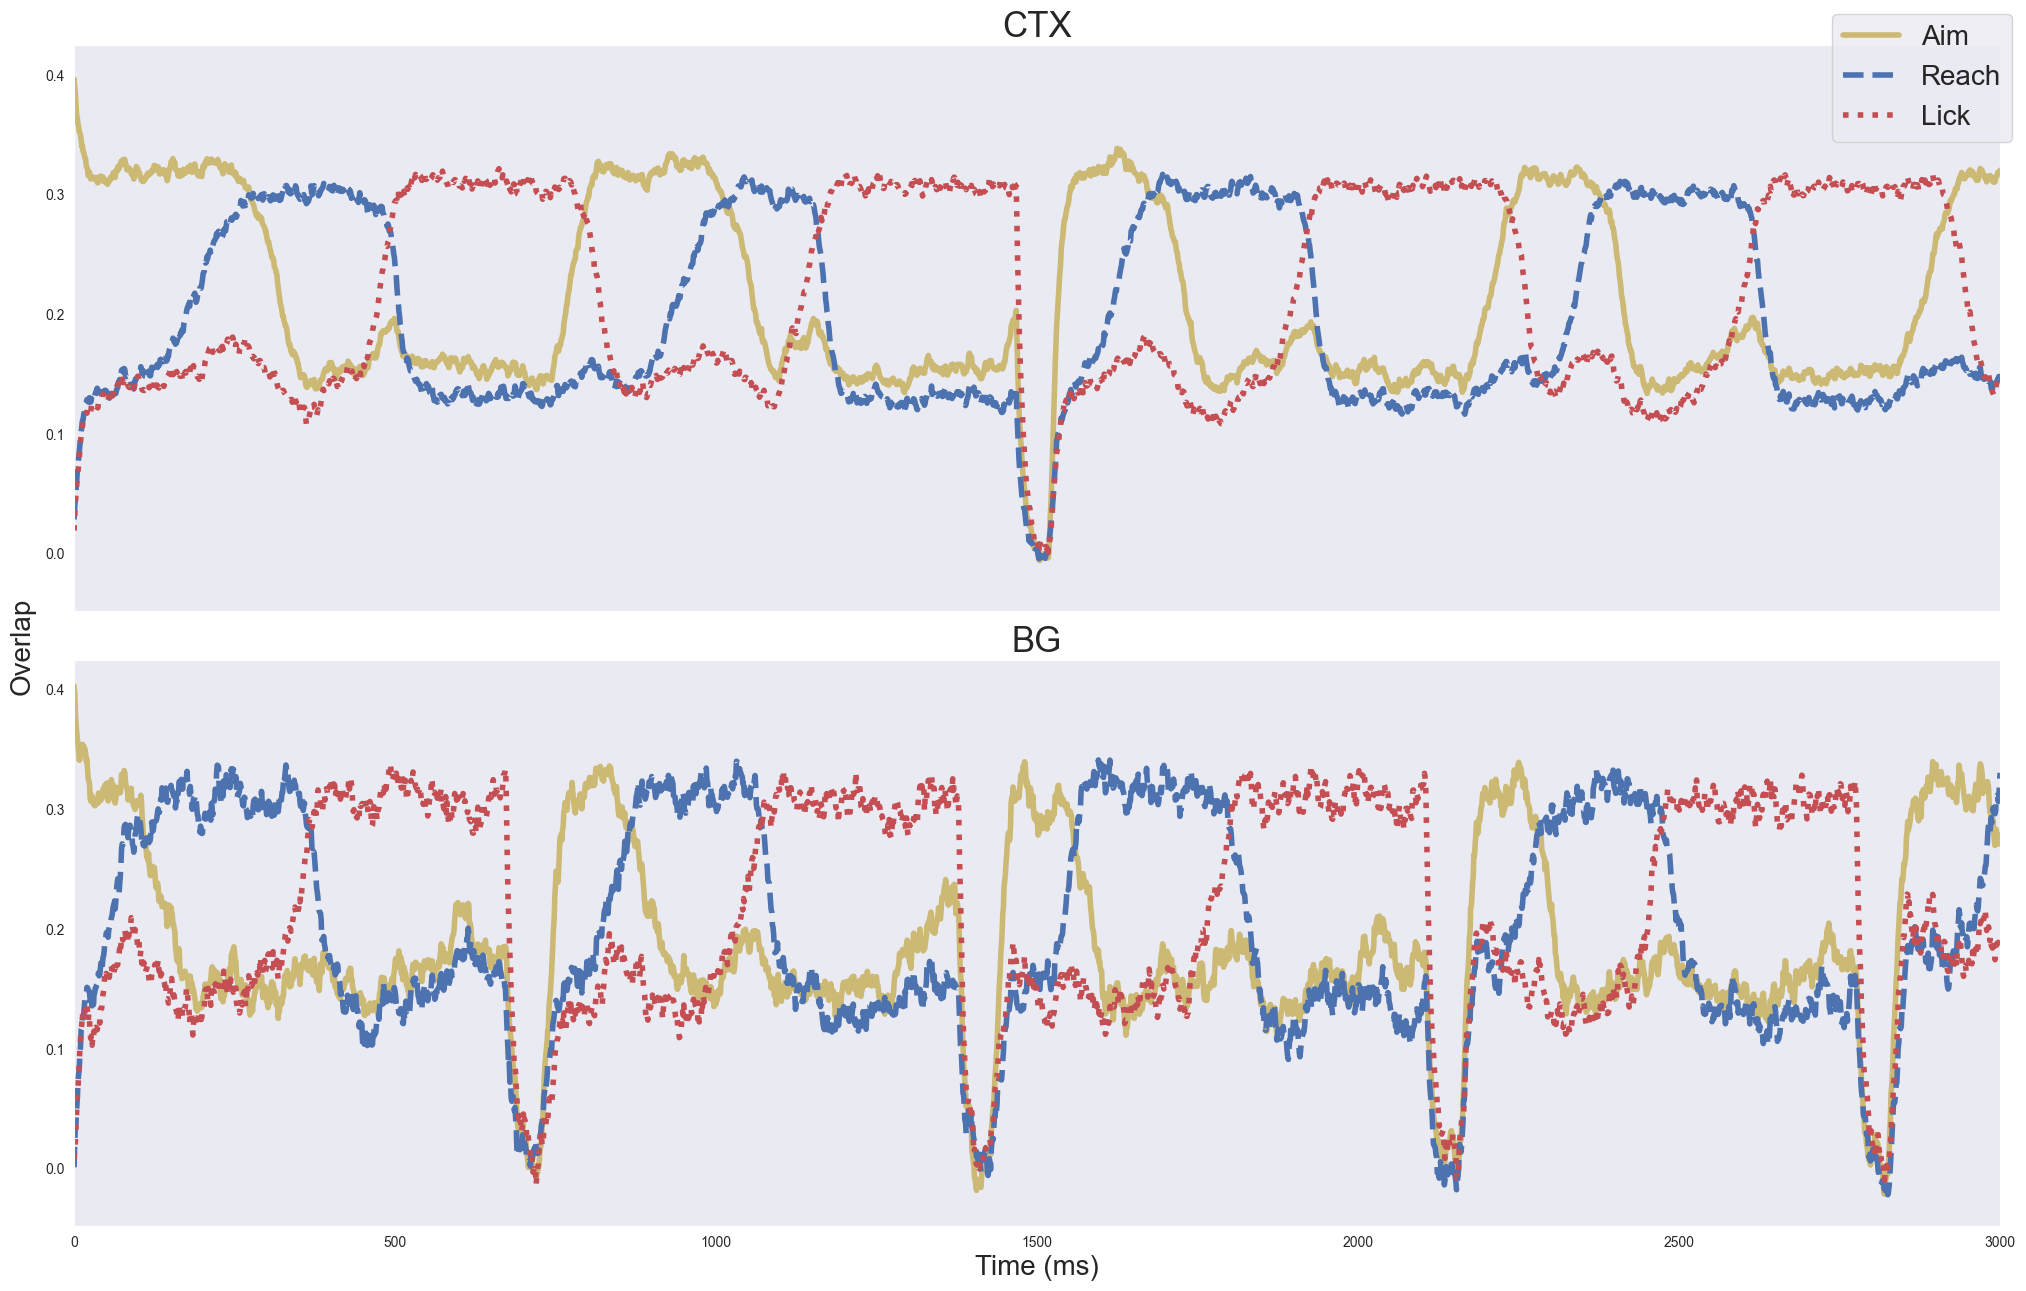

In [10]:
fig, axes = plt.subplots(2,1, sharex=True, sharey=True, tight_layout=True, figsize=(20,13))
axes[0].plot(overlaps_ctx[0], linestyle='solid', linewidth=4, color=colors[8])
axes[0].plot(overlaps_ctx[1], linestyle='dashed', linewidth=4, color=colors[0])
axes[0].plot(overlaps_ctx[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[0].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[0].set_title("CTX", fontsize=25)
axes[1].plot(overlaps_bg[0], linestyle='solid', linewidth=4, color=colors[8])
axes[1].plot(overlaps_bg[1], linestyle='dashed', linewidth=4, color=colors[0])
axes[1].plot(overlaps_bg[2], linestyle='dotted', linewidth=4, color=colors[3])
axes[1].set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
axes[1].set_title("BG", fontsize=25)
axes[1].set_xlabel('Time (ms)', fontsize=20)
fig.text(-0.01, 0.5, 'Overlap', va='center', rotation='vertical', fontsize=20)
plt.setp(axes, xlim=(0, 3000))
plt.figlegend(labels=['Aim', 'Reach', 'Lick'], fontsize=20)
plt.show()
